**In This project, we are going to analyze some Sales data within 12 months**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pandasdata/Sales_August_2019.csv
/kaggle/input/pandasdata/Sales_May_2019.csv
/kaggle/input/pandasdata/Sales_February_2019.csv
/kaggle/input/pandasdata/Sales_November_2019.csv
/kaggle/input/pandasdata/Sales_January_2019.csv
/kaggle/input/pandasdata/Sales_March_2019.csv
/kaggle/input/pandasdata/Sales_September_2019.csv
/kaggle/input/pandasdata/Sales_April_2019.csv
/kaggle/input/pandasdata/Sales_July_2019.csv
/kaggle/input/pandasdata/Sales_October_2019.csv
/kaggle/input/pandasdata/Sales_June_2019.csv
/kaggle/input/pandasdata/Sales_December_2019.csv


In [2]:
# Import Required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

%matplotlib inline

In [3]:
# Reading all the files in a single dataframe
df = pd.concat(map(pd.read_csv, glob.glob('/kaggle/input/pandasdata/*.csv')))

In [4]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [5]:
# checking the shape of data

df.shape

(186850, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [7]:
# General statistical observations

df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [8]:
# Checking the missed values

df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [9]:
# Now we change the Date into different single columns!

df['Order Date']

0        08/31/19 22:21
1        08/15/19 15:11
2        08/06/19 14:40
3        08/29/19 20:59
4        08/15/19 19:53
              ...      
25112    12/11/19 20:58
25113    12/01/19 12:01
25114    12/09/19 06:43
25115    12/03/19 10:39
25116    12/21/19 21:45
Name: Order Date, Length: 186850, dtype: object

In [10]:
# But first we have to change the format of date

df['Order Date']=pd.to_datetime(df['Order Date'], errors='coerce', format='%m/%d/%y %H:%M')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001"


In [11]:
# now we can split the date into single columns^^

df['Month'] = pd.to_datetime(df['Order Date']).dt.month
df['Time'] = pd.to_datetime(df['Order Date']).dt.time
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Time
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8.0,22:21:00
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8.0,15:11:00
2,236672,iPhone,1,700.0,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",8.0,14:40:00
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",8.0,20:59:00
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",8.0,19:53:00


In [12]:
# Turining our month column into integer!!
df['Month']=df['Month'].fillna(0)
df['Month']=df['Month'].astype('int')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Time
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,22:21:00
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,15:11:00
2,236672,iPhone,1,700.0,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",8,14:40:00
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",8,20:59:00
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",8,19:53:00


In [13]:
# converting Quantity Ordered and  Price column into integer using pd.to_numeric^^

df['Quantity Ordered']= pd.to_numeric(df['Quantity Ordered'],errors='coerce')
df['Price Each']= pd.to_numeric(df['Price Each'],errors='coerce')

# Add a new column for sale^^
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Time,Sales
0,236670,Wired Headphones,2.0,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,22:21:00,23.98
1,236671,Bose SoundSport Headphones,1.0,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,15:11:00,99.99
2,236672,iPhone,1.0,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",8,14:40:00,700.00
3,236673,AA Batteries (4-pack),2.0,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",8,20:59:00,7.68
4,236674,AA Batteries (4-pack),2.0,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",8,19:53:00,7.68


# What was the best month for sales?? And how much was earned in that month??

In [14]:
# Check for missing values after conversion
df['Month'] = df['Month'].fillna(0).astype(int)

# Group and sum numeric columns only
df_grouped = df.groupby('Month').sum(numeric_only=True)

# Display the result
df_grouped


,Quantity Ordered,Price Each,Sales
Month,,,
0,0.0,0.00,0.00
1,10903.0,1811768.38,1822256.73
2,13449.0,2188884.72,2202022.42
3,17005.0,2791207.83,2807100.38
4,20558.0,3367671.02,3390670.24
5,18667.0,3135125.13,3152606.75
6,15253.0,2562025.61,2577802.26
7,16072.0,2632539.56,2647775.76
8,13448.0,2230345.42,2244467.88


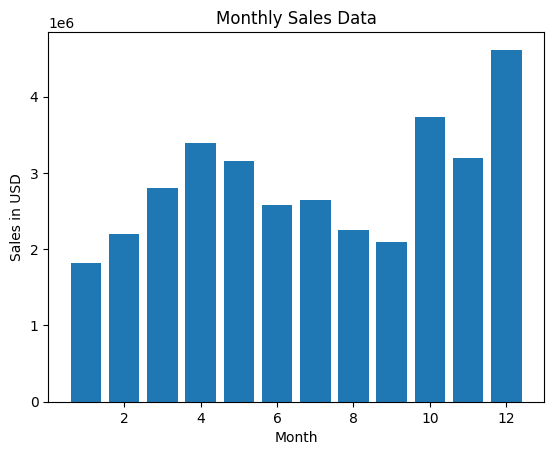

In [15]:
# Remove rows where 'Month' is zero
df_grouped = df_grouped[df_grouped.index != 0]

# Plot again
months = range(1, 13)
plt.bar(months, df_grouped['Sales'])
plt.xlabel('Month')
plt.ylabel('Sales in USD')
plt.title('Monthly Sales Data')
plt.show()


# What city sold the most product??

In [16]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Time,Sales
0,236670,Wired Headphones,2.0,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,22:21:00,23.98
1,236671,Bose SoundSport Headphones,1.0,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,15:11:00,99.99
2,236672,iPhone,1.0,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",8,14:40:00,700.00
3,236673,AA Batteries (4-pack),2.0,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",8,20:59:00,7.68
4,236674,AA Batteries (4-pack),2.0,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",8,19:53:00,7.68


In [17]:
# Gettign rid of NaN values from dataset

df=df.dropna(axis=0)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Time,Sales
0,236670,Wired Headphones,2.0,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,22:21:00,23.98
1,236671,Bose SoundSport Headphones,1.0,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,15:11:00,99.99
2,236672,iPhone,1.0,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",8,14:40:00,700.00
3,236673,AA Batteries (4-pack),2.0,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",8,20:59:00,7.68
4,236674,AA Batteries (4-pack),2.0,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",8,19:53:00,7.68


In [18]:
# Add the "City" column and split the city from Purchase address using lambda

def city(adress):
    return adress.split(',')[1]

df['City'] = df['Purchase Address'].apply(lambda x: city(x))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Time,Sales,City
0,236670,Wired Headphones,2.0,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,22:21:00,23.98,Seattle
1,236671,Bose SoundSport Headphones,1.0,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,15:11:00,99.99,Dallas
2,236672,iPhone,1.0,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",8,14:40:00,700.00,Portland
3,236673,AA Batteries (4-pack),2.0,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",8,20:59:00,7.68,Los Angeles
4,236674,AA Batteries (4-pack),2.0,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",8,19:53:00,7.68,New York City


In [19]:
result2 = df.groupby('City').sum(numeric_only=True)
result2

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta,16602.0,2779908.20,104794,2795498.58
Austin,11153.0,1809873.61,69829,1819581.75
Boston,22528.0,3637409.77,141112,3661642.01
Dallas,16730.0,2752627.82,104620,2767975.40
Los Angeles,33289.0,5421435.23,208325,5452570.80
New York City,27932.0,4635370.83,175741,4664317.43
Portland,14053.0,2307747.47,87765,2320490.61
San Francisco,50239.0,8211461.74,315520,8262203.91
Seattle,16553.0,2733296.01,104941,2747755.48


# visulalizing the result

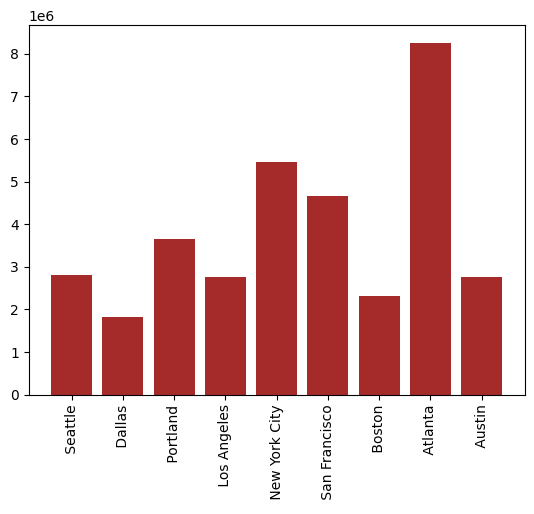

In [20]:
cities = df['City'].unique()

plt.bar(cities, result2['Sales'], color='brown')
plt.xticks(cities, rotation='vertical')
plt.show()
# this didnt match to the answer. True answer should be San Francisco

# There's an issue between .unique() method and plt.bar(). Their cities order are different. we're gonna syncronized the order by simply fixing the variable 'cities'.

In [21]:
cities=df['City'].unique()
cities

array([' Seattle', ' Dallas', ' Portland', ' Los Angeles',
       ' New York City', ' San Francisco', ' Boston', ' Atlanta',
       ' Austin'], dtype=object)

In [22]:
cities = [i for i , df in df.groupby('City')]
print(cities)

[' Atlanta', ' Austin', ' Boston', ' Dallas', ' Los Angeles', ' New York City', ' Portland', ' San Francisco', ' Seattle']


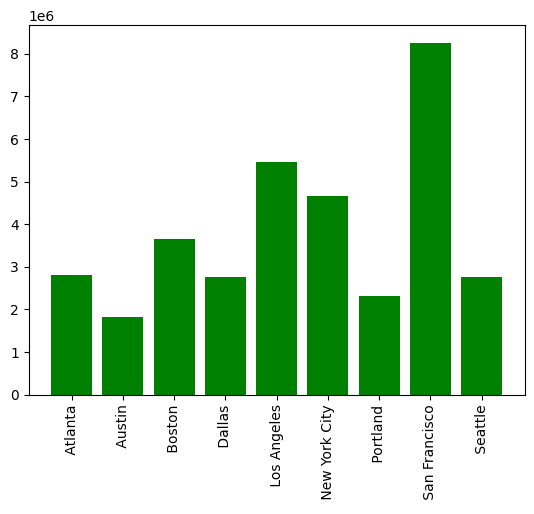

In [23]:
# So lets create bar plot now

cities = [i for i, df in df.groupby('City')]

plt.bar(cities, result2['Sales'], color='green')
plt.xticks(cities, rotation='vertical')
plt.show()

**At what time are the products ordered most??**

In [24]:
df.groupby('Time').count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
Time,,,,,,,,,
00:00:00,82,82,82,82,82,82,82,82,82
00:01:00,65,65,65,65,65,65,65,65,65
00:02:00,71,71,71,71,71,71,71,71,71
00:03:00,89,89,89,89,89,89,89,89,89
00:04:00,84,84,84,84,84,84,84,84,84
...,...,...,...,...,...,...,...,...,...
23:55:00,97,97,97,97,97,97,97,97,97
23:56:00,73,73,73,73,73,73,73,73,73
23:57:00,88,88,88,88,88,88,88,88,88


In [25]:
# changing our time into numbers

df['Hours'] = pd.to_datetime(df['Order Date']).dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Time,Sales,City,Hours
0,236670,Wired Headphones,2.0,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,22:21:00,23.98,Seattle,22
1,236671,Bose SoundSport Headphones,1.0,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,15:11:00,99.99,Dallas,15
2,236672,iPhone,1.0,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",8,14:40:00,700.00,Portland,14
3,236673,AA Batteries (4-pack),2.0,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",8,20:59:00,7.68,Los Angeles,20
4,236674,AA Batteries (4-pack),2.0,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",8,19:53:00,7.68,New York City,19


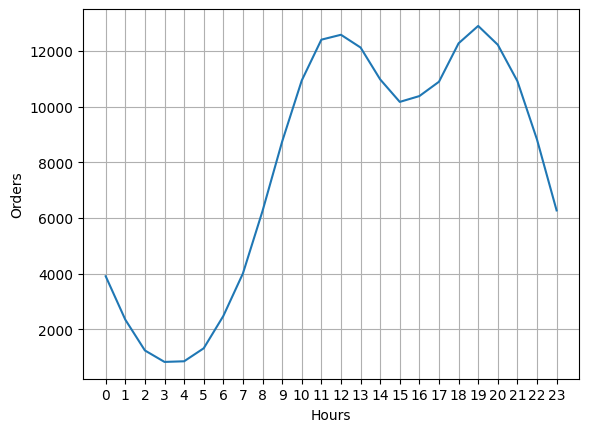

In [26]:
result3 = df.groupby(['Hours'])['Quantity Ordered'].count()
time = [i for i, df in df.groupby('Hours')]

plt.plot(time, result3)
plt.xticks(time)
plt.xlabel('Hours')
plt.ylabel('Orders')
plt.grid()
plt.show()

**Now we can see that the most beneficial time to play advertisement is before 11 AM and 19 PM**

# What products are sold most??

In [27]:
prd = df.groupby('Product')

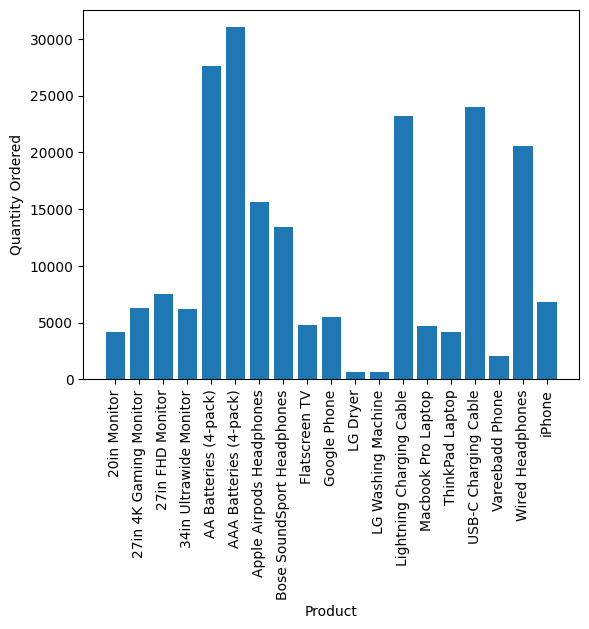

In [28]:
# lets visualize to understand our data

quant_order = prd['Quantity Ordered'].sum()

product = [ i for i, df in prd]

plt.bar(product, quant_order)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.xticks(product, rotation='vertical')
plt.show()